In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import linear_model

# Optimization

Optimization is applying an objective function and a regularizer.

Let's look at a parabola as our data and try to fit this model. We'll use a $p^{th}$ degree polynomial to predict the outcome, that is, we take our model to be:

$$
\textbf{Y} = f(\textbf{X}, \mathbf{ \beta })\\
\begin{bmatrix}
| &  | &  | &  \cdots &  | \\
1 &  x_j &  x^2_j &  \cdots &  x^{p-1}_j \\
| &  | &  | &  \cdots &  | 
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\vdots \\
\beta_p
\end{bmatrix}
= 
\begin{bmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_{100})
\end{bmatrix}
$$

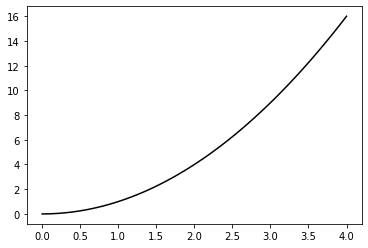

In [2]:
n = 100
L = 4
x = np.linspace(0,L,n)
f = np.power(x,2) # Parabola with 100 data points

M = 20 # Polynomial degree

phi = np.zeros((n,M))
for j in range(M):
    phi[:,j] = np.power(x,j) # Build matrix A
    
plt.figure()
plt.plot(x,f,color='k')

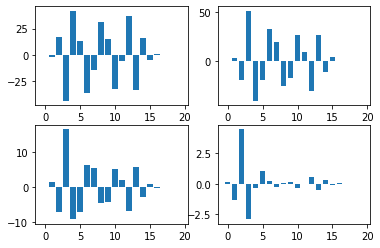

In [3]:
fig = plt.figure()
axs = fig.subplots(2,2)
axs = axs.reshape(-1)

for j in range(4):
    # add some random noise
    fn = np.power(x,2) + 0.1*np.random.randn(*x.shape)
    
    # Least-square fit
    an = np.linalg.pinv(phi) @ fn
    fna = phi @ an 
    En = np.linalg.norm(f-fna,ord=2)/np.linalg.norm(f,ord=2)
    
    axs[j].bar(range(len(an)),an)

Here we can see that model parameters highly vary and subject to a wide range of differences when adding little noise.

/home/panda/.conda/envs/guide/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.454903969598023, tolerance: 0.23220216160856919
  positive)
/home/panda/.conda/envs/guide/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.397178604043205, tolerance: 0.23220216160856919
  positive)
/home/panda/.conda/envs/guide/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.07080821877562, tolerance: 0.23588641891806858
  positive)
/home/panda/.conda/envs/guide/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not conve

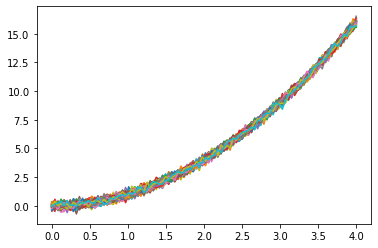

In [4]:
## Different regressions
plt.figure()
plt.plot(x,f,color='k')

lam = 0.1
phi2 = phi[:,1:]
E1 = np.zeros(100)
E2 = np.zeros(100)
E3 = np.zeros(100)
E4 = np.zeros(100)
E5 = np.zeros(100)
E6 = np.zeros(100)

A1 = np.zeros((M,100))
A2 = np.zeros((M,100))
A3 = np.zeros((M,100))
A4 = np.zeros((M,100))
A5 = np.zeros((M,100))
A6 = np.zeros((M,100))

for jj in range(100):
# for jj in range(10):
    f = np.power(x,2)+0.2*np.random.randn(n)
    
    # pseudo-inverse (Least-Squared, L2)
    a1 = np.linalg.pinv(phi) @ f
    f1 = phi @ a1
    E1[jj] = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)
    
    # least-square regression
    a2 = np.linalg.lstsq(phi,f,rcond=None)[0]
    f2 = phi @ a2
    E2[jj] = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)
    
    # LASSO lambda=1
    regr3 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr3.fit(phi, f)  
    a3 = regr3.coef_
    f3 = phi @ a3
    E3[jj] = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)
    
    # LASSO lambda=0.8
    regr4 = linear_model.ElasticNet(alpha=0.8, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr4.fit(phi, f)  
    a4 = regr4.coef_
    f4 = phi @ a4
    E4[jj] = np.linalg.norm(f-f4,ord=2)/np.linalg.norm(f,ord=2)
    
    # robust fit
    huber = linear_model.HuberRegressor().fit(phi, f) # matlab's robustfit() does not have an exact sklearn analogue
    a5 = huber.coef_
    f5 = phi @ a5
    E5[jj] = np.linalg.norm(f-f5,ord=2)/np.linalg.norm(f,ord=2)

    # ridge regression
    ridge = linear_model.Ridge(alpha=1.0).fit(phi,f)
    a6 = ridge.coef_
    f6 = phi @ a6
    E6[jj] = np.linalg.norm(f-f6,ord=2)/np.linalg.norm(f,ord=2)

    
    A1[:,jj] = a1
    A2[:,jj] = a2
    A3[:,jj] = a3
    A4[:,jj] = a4
    A5[:,jj] = a5
    A6[:,jj] = a6

    plt.plot(x,f)
    
Err = np.column_stack((E1,E2,E3,E4,E5,E6))
Err2 = np.column_stack((E1,E2,E3,E4,E5))

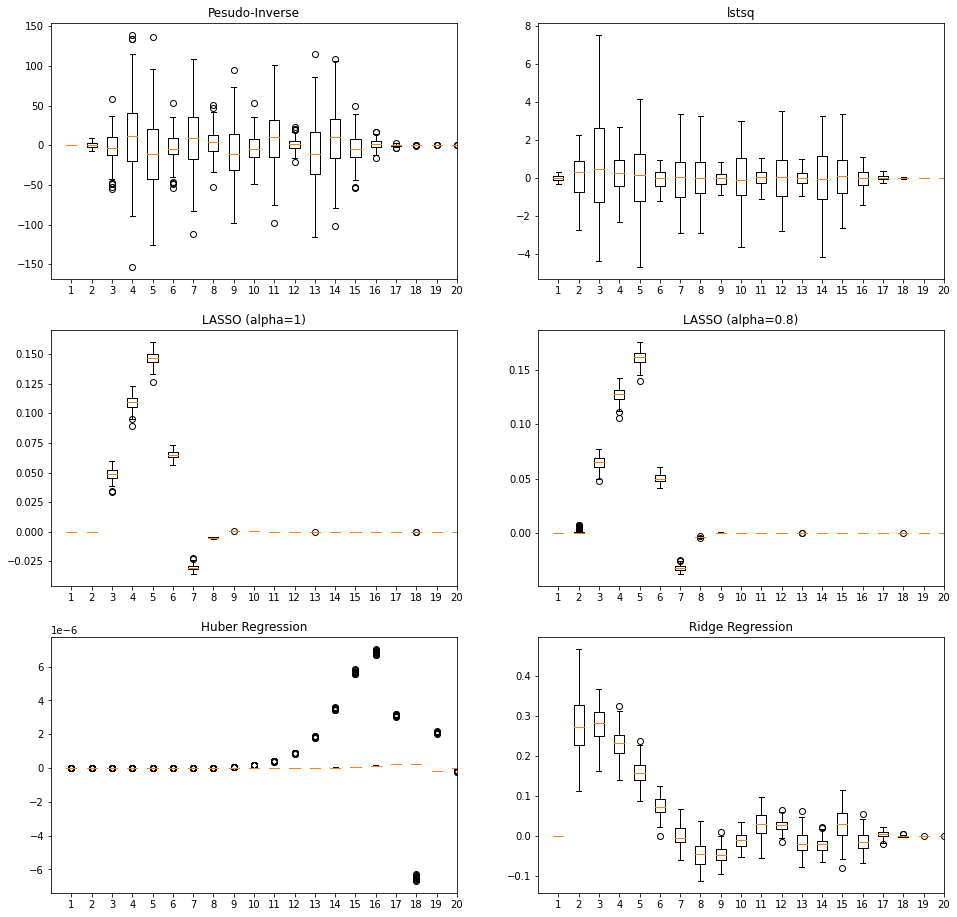

In [5]:
fig = plt.figure(figsize=(16,16))
axs = fig.subplots(3,2)
axs = axs.reshape(-1)

axs[0].boxplot(A1.T)
axs[0].set_title('Pesudo-Inverse')
axs[1].boxplot(A2.T)
axs[1].set_title('lstsq')
axs[2].boxplot(A3.T)
axs[2].set_title('LASSO (alpha=1)')
axs[3].boxplot(A4.T)
axs[3].set_title('LASSO (alpha=0.8)')
axs[4].boxplot(A5.T)
axs[4].set_title('Huber Regression')
axs[5].boxplot(A6.T)
axs[5].set_title('Ridge Regression')

for ax in axs:
    ax.set_xlim(0,M)

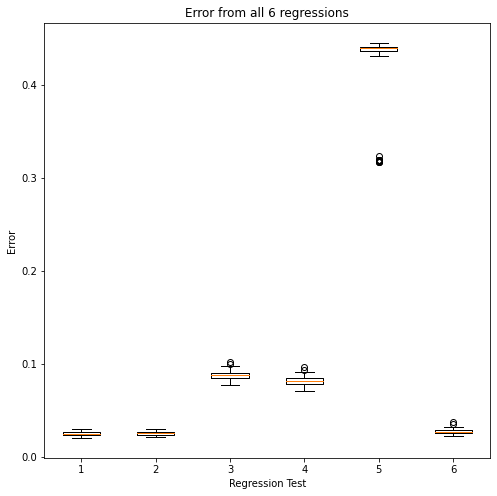

In [6]:
plt.figure(figsize=(8, 8))
plt.boxplot(Err)
plt.title('Error from all 6 regressions')
plt.ylabel('Error')
plt.xlabel('Regression Test')
plt.show()